In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
#import seaborn as sns

### Task 1: Join all the csv files into one dataset

In [2]:
#define path to CSV files
path = r'C:\Users\karol\sales_data'

#identify all CSV files
all_files = glob.glob(os.path.join("*.csv"))

#merge all CSV files into one DataFrame
sales_data = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [97]:
sales_data.to_csv('all_sales.csv')

In [92]:
sales_data.shape

(185686, 12)

In [95]:
sales_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour', 'Day of Month'],
      dtype='object')

In [94]:
#sales_data.drop(['Day_of_Month'],axis=1, inplace=True)

In [8]:
sales_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"


In [9]:
sales_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

### Clean data! 

   ### Drop rows of NAN

In [12]:
sales_data = sales_data.dropna(how='all')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [13]:
#sales_data.dropna([],axis=0, inplace=True)
sales_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [ ]:
#sales_data = sales_data.drop(['Unnamed: 0.5'], axis=1)
#sales_data.head(1)

### Find 'Or' and delete it

In [14]:
sales_data = sales_data[sales_data['Order Date'].str[0:2] != 'Or']
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Convert columns to the correct type

In [15]:
# Make float 
sales_data['Price Each'] = sales_data['Price Each'].astype('float')
sales_data['Price Each'].dtype

dtype('float64')

In [16]:
# convert to numeric
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'])
sales_data['Quantity Ordered'].dtype

dtype('int64')

In [17]:
# convert to int
sales_data['Quantity Ordered'] = sales_data['Quantity Ordered'].astype('int64')
sales_data['Quantity Ordered'].dtype

dtype('int64')

### Augment data with additional columns

  ### Task 2: Add month column

In [18]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

In [19]:
# Extract months
sales_data['Month'] = sales_data['Order Date'].dt.month

In [20]:
sales_data['Month'].unique()

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10], dtype=int64)

In [21]:
sales_data['Month'].dtype

dtype('int64')

In [46]:
# Extract hour
#sales_data['Hour'] = sales_data['Order Date'].dt.hour

In [47]:
#sales_data['Hour'].dtype

### Task 3: Add a sales column

In [48]:
sales_data['Sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


### Task 4: Add a city column
     
  ###### Extract city and state from 'Purchase Address'  column

In [49]:
# get city
def get_city(address):
    return address.split(',')[1]

# get the state
def get_state(address):
    return address.split(',')[2].split(' ')[1]

sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


### Question 1: what was the best month for sales? How much was earned that month?

In [109]:
month_sales = sales_data.groupby('Month')['Sales'].sum()
month_sales.to_csv('sales_by_month.csv')
month_sales

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: Sales, dtype: float64

Text(0.5, 0, 'Month Number')

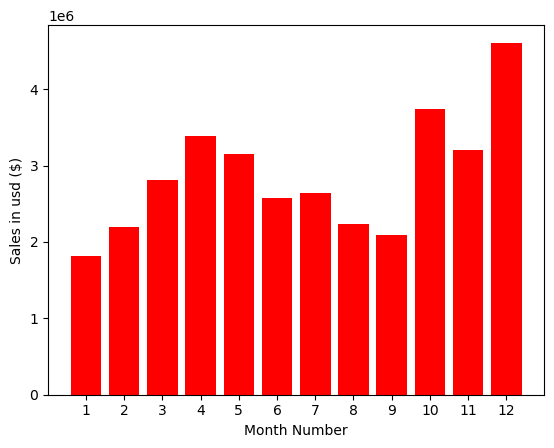

In [118]:
months = range(1,13)
plt.bar(months,  month_sales,color='r')
plt.xticks(months)
plt.ylabel('Sales in usd ($)')
plt.xlabel('Month Number')

# Best month of sales is december

In [52]:
# reset index
sales_data = sales_data.reset_index(drop=True)
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


### Question 2: what city hasd the highest number of sales?

In [102]:
cities_sales = sales_data.groupby('City')['Sales'].sum()
cities_sales.to_csv('sales_by_city.csv')
cities_sales

City
 Atlanta (GA)          2794199.07
 Austin (TX)           1818044.33
 Boston (MA)           3658627.65
 Dallas (TX)           2765373.96
 Los Angeles (CA)      5448304.28
 New York City (NY)    4661867.14
 Portland (ME)          449321.38
 Portland (OR)         1870010.56
 San Francisco (CA)    8254743.55
 Seattle (WA)          2745046.02
Name: Sales, dtype: float64

Text(0.5, 0, 'City name')

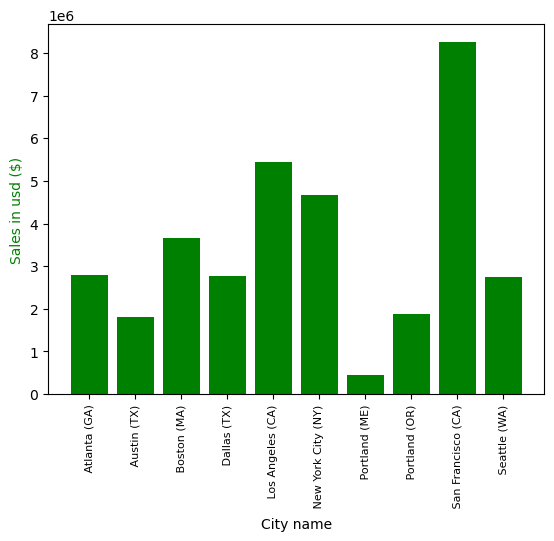

In [54]:
cities = [city for city, sales_data in sales_data.groupby('City')]
plt.bar(cities, cities_sales['Sales'],color='g')
plt.xticks(cities, rotation ='vertical', fontsize=8)
plt.ylabel('Sales in usd ($)', color='g')
plt.xlabel('City name')

# city with the highest sales is San Francisco (CA)

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying products?

### Task 5: create Hour and minutes column

In [58]:
# convert to datetime format
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Order Date'].dtype

dtype('<M8[ns]')

In [69]:
sales_data['Hour'] = sales_data['Order Date'].dt.hour

In [107]:
sales_by_hour = sales_data.groupby('Hour')['Sales'].sum()

sales_by_hour.to_csv('sales_by_hour.csv')
sales_by_hour

Hour
0      713548.66
1      460563.90
2      234839.45
3      145742.94
4      162546.07
5      230664.87
6      447963.01
7      744067.32
8     1192309.20
9     1638784.04
10    1942988.08
11    2296619.84
12    2314359.85
13    2152369.98
14    2082513.70
15    1940623.20
16    1902523.20
17    2126553.97
18    2218374.01
19    2411971.14
20    2280784.36
21    2040790.48
22    1606243.85
23    1177792.82
Name: Sales, dtype: float64

Text(0.5, 0, 'Hour')

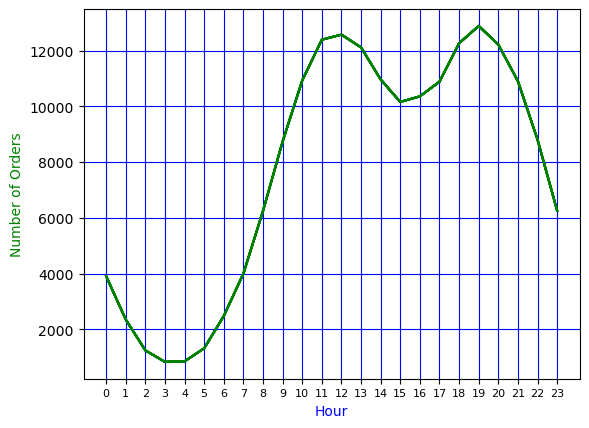

In [76]:
# groupby 'Hour' and Counted number of rows by each hour.
hours = [hour for hour, sales_data in sales_data.groupby('Hour')]
plt.plot(hours, sales_data.groupby(['Hour']).count(), color='g')
plt.xticks(hours, fontsize=8)
plt.grid(color='b')
plt.ylabel('Number of Orders', color='g')
plt.xlabel('Hour', color='b')

# My recomendantion is arround 11am (11) or 7pm (19)

In [ ]:
sales_data['Minute'] = sales_data['Order Date'].dt.minute

In [75]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Day_of_Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,19
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,7
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,12
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,12
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,30


### Question 4: What product sold the most? 

In [77]:
product_group = sales_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

quantity_ordered.to_csv('quatity_ordered_by_prod.csv')
quantity_ordered

# the most sold product: AAA Batteries (4-pack)
# number of times sold: 155.085

C:\Users\karol\AppData\Local\Temp\ipykernel_26676\3200985298.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


Product
20in Monitor                   4126
27in 4K Gaming Monitor         6239
27in FHD Monitor               7541
34in Ultrawide Monitor         6192
AA Batteries (4-pack)         27615
AAA Batteries (4-pack)        30986
Apple Airpods Headphones      15637
Bose SoundSport Headphones    13430
Flatscreen TV                  4813
Google Phone                   5529
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23169
Macbook Pro Laptop             4725
ThinkPad Laptop                4128
USB-C Charging Cable          23931
Vareebadd Phone                2068
Wired Headphones              20524
iPhone                         6847
Name: Quantity Ordered, dtype: int64

Text(0.5, 0, 'Product Name')

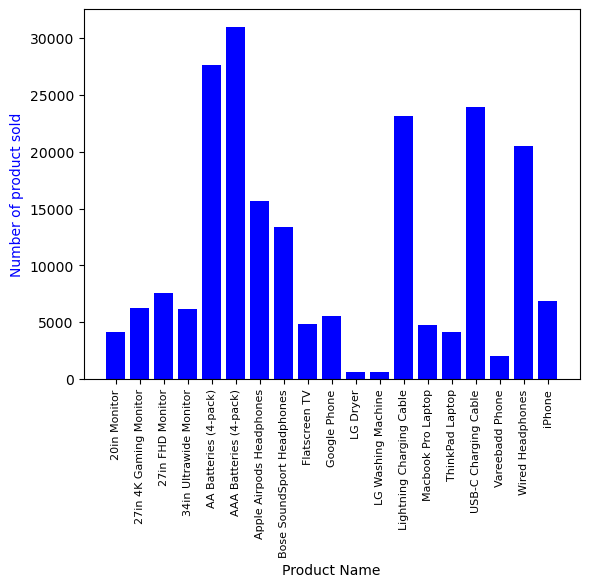

In [78]:
# bar chart
products = [product for product, sales_data in product_group]
plt.bar(products, quantity_ordered, color='b')
plt.xticks(products, rotation ='vertical', fontsize=8)
plt.ylabel('Number of product sold', color='b')
plt.xlabel('Product Name')


### Question 5: Why the AAA Batteries (4-pack) is the most sold product? 
   ###### number of times sold: 155.085

C:\Users\karol\AppData\Local\Temp\ipykernel_26676\2966143021.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_prices = sales_data.groupby('Product').mean()['Price Each']
C:\Users\karol\AppData\Local\Temp\ipykernel_26676\2966143021.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


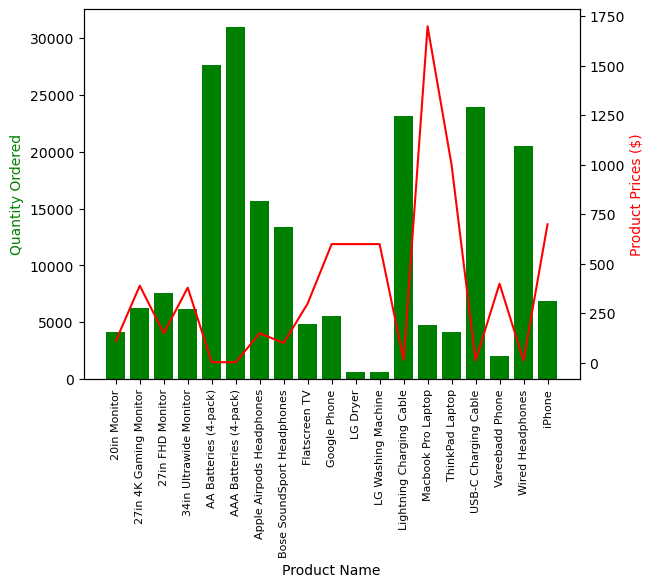

In [82]:
product_prices = sales_data.groupby('Product').mean()['Price Each']
#print(product_prices)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, product_prices, 'r-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Product Prices ($)', color='r')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()


### Question 6: What day of month has the most sales
 ##### Task 6: create day of month column

In [84]:
sales_data['Day of Month'] = sales_data['Order Date'].dt.day

In [85]:
sales_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Day_of_Month,Day of Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,19,19
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,7,7
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,12,12
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,12,12
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,30,30


In [114]:
day_with_most_sales = sales_data.groupby('Day of Month')['Sales'].sum()
day_with_most_sales.to_csv('sales_by_day.csv')

day_with_most_sales.head(10)

Day of Month
1     1164859.49
2     1137215.59
3     1074294.06
4     1163640.17
5     1135007.86
6     1151786.51
7     1093460.78
8     1106530.63
9     1169049.22
10    1168880.92
Name: Sales, dtype: float64

### Product By Price

In [110]:
product_prices = sales_data.groupby('Product').mean()['Price Each']

product_prices.to_csv('prod_prices.csv')

print(product_prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\karol\AppData\Local\Temp\ipykernel_26676\1829450724.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_prices = sales_data.groupby('Product').mean()['Price Each']


###  The AAA Batteries (4-pack) it's the most cheap product:
#####  AAA Batteries (4-pack)  Price: 2.99$ 

As you can see in the graph above, when the product price is high, the quantity order is low.

When the product price is low, quantity ordered is high.

     Why Macbook Pro Laptop and ThinkPad Laptop prices are hight, but there's a high qunatity ordered?
One of the reasons is because, there's many students and business that need a computer to function.